## Imports

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

## Path and files

In [2]:
train_normal_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')

test_normal_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/test/NORMAL')
test_pneumonia_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')

val_normal_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/val/NORMAL')
val_pneumonia_dir = os.path.join('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA')

print('Total of training normal images:', len(os.listdir(train_normal_dir)))
print('Total of training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('Total of test normal images:', len(os.listdir(test_normal_dir)))
print('Total of test pneumonia images:', len(os.listdir(test_pneumonia_dir)))
print('Total of val normal images:', len(os.listdir(val_normal_dir)))
print('Total of val pneumonia images:', len(os.listdir(val_pneumonia_dir)))

Total of training normal images: 1341
Total of training pneumonia images: 3875
Total of test normal images: 234
Total of test pneumonia images: 390
Total of val normal images: 8
Total of val pneumonia images: 8


In [3]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/train/NORMAL')

['NORMAL2-IM-0771-0001.jpeg',
 'NORMAL2-IM-1294-0001-0002.jpeg',
 'IM-0675-0001.jpeg',
 'NORMAL2-IM-1169-0001.jpeg',
 'IM-0421-0001.jpeg',
 'NORMAL2-IM-0531-0001.jpeg',
 'NORMAL2-IM-0416-0001-0002.jpeg',
 'NORMAL2-IM-0965-0001.jpeg',
 'NORMAL2-IM-0627-0001.jpeg',
 'NORMAL2-IM-0997-0001.jpeg',
 'NORMAL2-IM-0757-0001.jpeg',
 'IM-0629-0001-0002.jpeg',
 'IM-0588-0001.jpeg',
 'IM-0713-0001.jpeg',
 'NORMAL2-IM-0696-0001.jpeg',
 'NORMAL2-IM-0808-0001.jpeg',
 'NORMAL2-IM-1126-0001.jpeg',
 'IM-0701-0001.jpeg',
 'NORMAL2-IM-1046-0001.jpeg',
 'IM-0304-0001.jpeg',
 'NORMAL2-IM-0385-0001.jpeg',
 'NORMAL2-IM-0908-0001.jpeg',
 'NORMAL2-IM-1301-0001.jpeg',
 'NORMAL2-IM-0428-0001.jpeg',
 'NORMAL2-IM-1318-0001.jpeg',
 'IM-0626-0001-0001.jpeg',
 'NORMAL2-IM-0399-0001.jpeg',
 'IM-0452-0001.jpeg',
 'IM-0672-0001.jpeg',
 'IM-0314-0001.jpeg',
 'NORMAL2-IM-0578-0001.jpeg',
 'NORMAL2-IM-1171-0001.jpeg',
 'NORMAL2-IM-1401-0001.jpeg',
 'IM-0313-0001.jpeg',
 'IM-0461-0001.jpeg',
 'IM-0578-0001.jpeg',
 'IM-0613-00

## Taking a look at some images

In [4]:
_pth = '../input/chest-xray-pneumonia/chest_xray/train/'
_train_normal = _pth + 'NORMAL/'
_train_pneumonia = _pth + 'PNEUMONIA/'

### A normal one

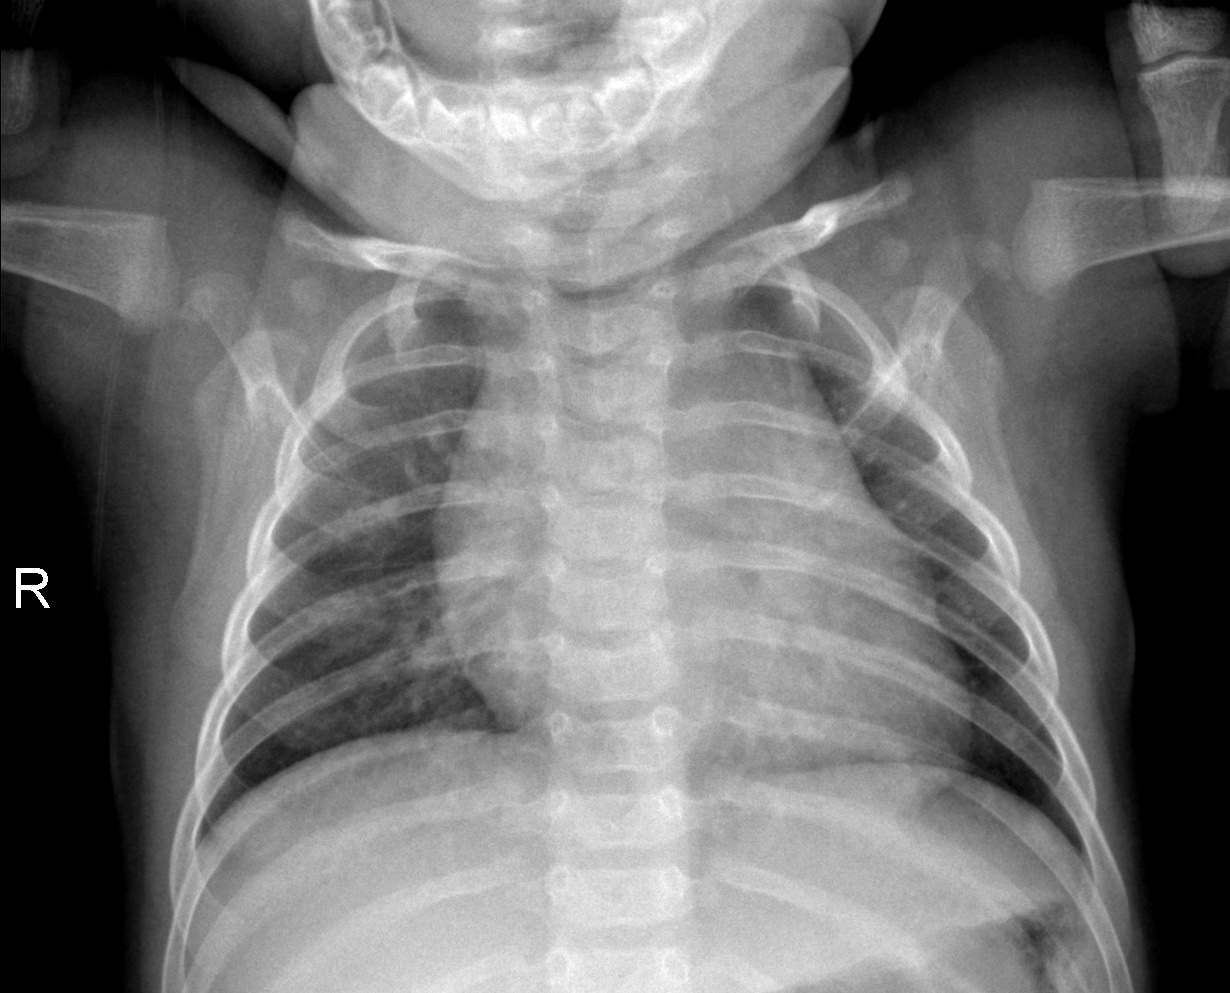

In [5]:
Image.open(_train_normal+os.listdir(_train_normal)[100])

### A bacterial pneumonia one

person57_bacteria_270.jpeg


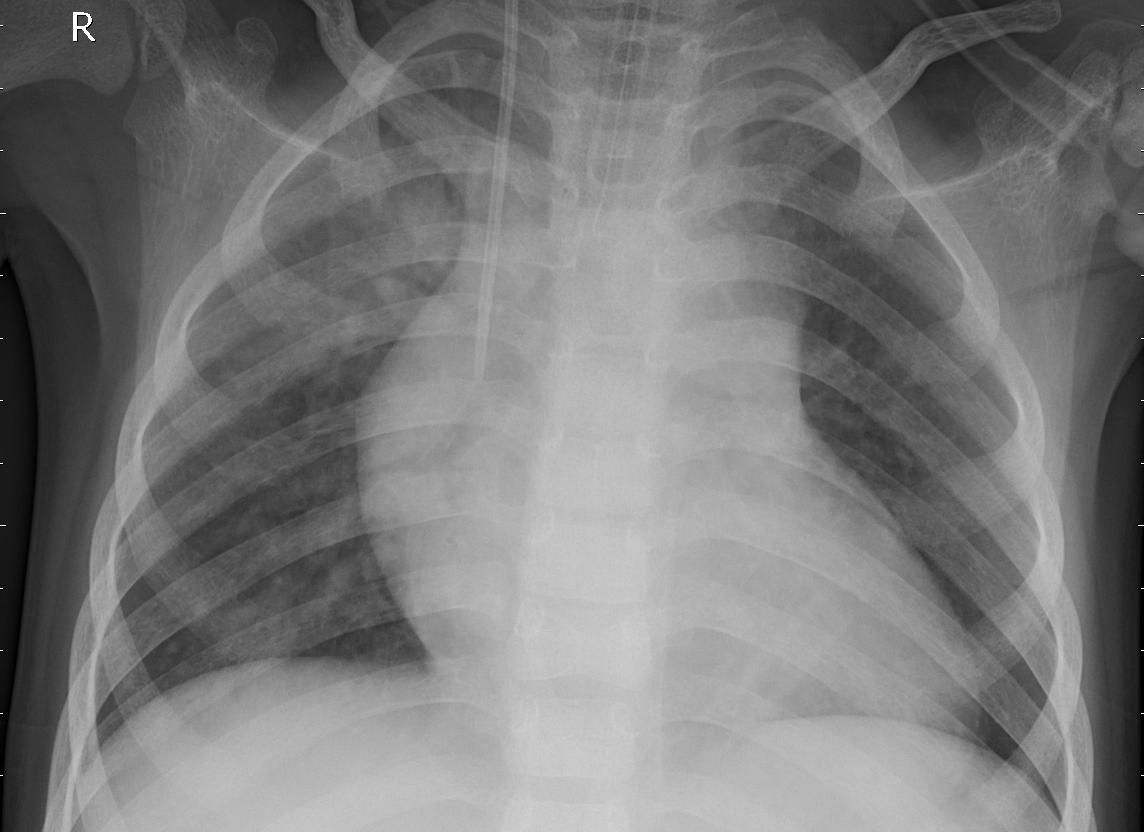

In [6]:
print(os.listdir(_train_pneumonia)[10])
Image.open(_train_pneumonia+os.listdir(_train_pneumonia)[10])

### A viral one

person1180_virus_2010.jpeg


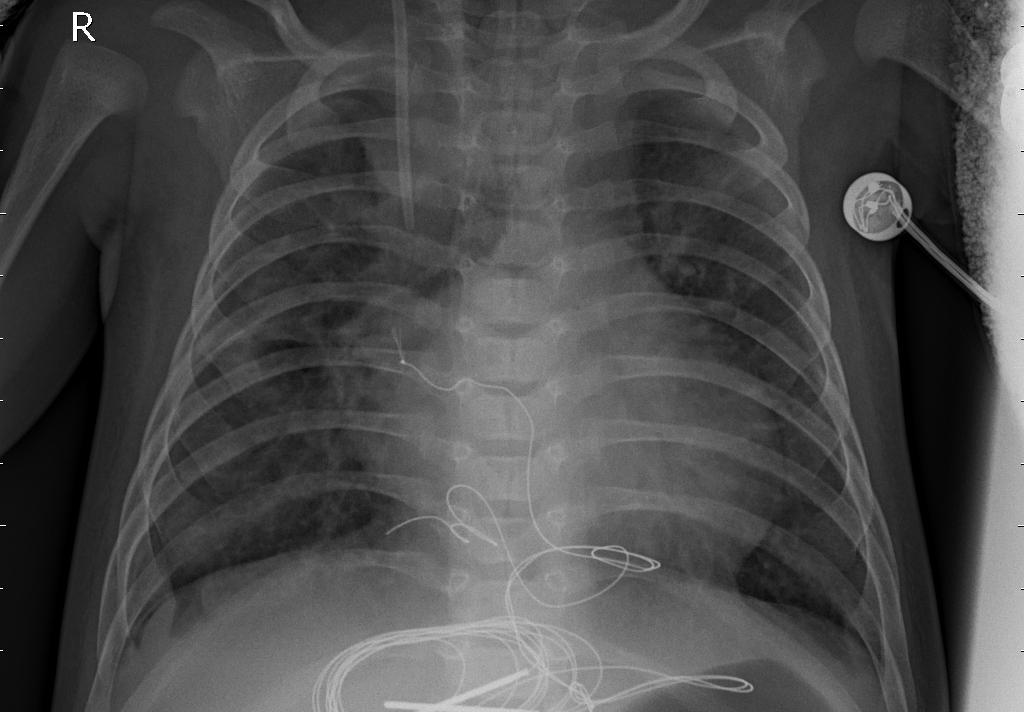

In [7]:
print(os.listdir(_train_pneumonia)[0])
Image.open(_train_pneumonia+os.listdir(_train_pneumonia)[0])

## The model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        1

### Using data augmentation in training set

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/train/',
        target_size=(300, 300),  # resize
        batch_size=128,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/val/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Fitting the model

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=20,
      verbose=2,
      validation_data=test_generator,
      validation_steps=10)

Epoch 1/20
10/10 - 53s - loss: 0.7085 - accuracy: 0.6977 - val_loss: 0.6706 - val_accuracy: 0.6250
Epoch 2/20
10/10 - 39s - loss: 0.5719 - accuracy: 0.7484
Epoch 3/20
10/10 - 38s - loss: 0.5583 - accuracy: 0.7531
Epoch 4/20
10/10 - 36s - loss: 0.5648 - accuracy: 0.7516
Epoch 5/20
10/10 - 37s - loss: 0.5555 - accuracy: 0.7461
Epoch 6/20
10/10 - 34s - loss: 0.5583 - accuracy: 0.7564
Epoch 7/20
10/10 - 34s - loss: 0.5521 - accuracy: 0.7348
Epoch 8/20
10/10 - 33s - loss: 0.5132 - accuracy: 0.7539
Epoch 9/20
10/10 - 33s - loss: 0.4546 - accuracy: 0.7898
Epoch 10/20
10/10 - 32s - loss: 0.4148 - accuracy: 0.8045
Epoch 11/20
10/10 - 32s - loss: 0.3272 - accuracy: 0.8606
Epoch 12/20
10/10 - 31s - loss: 0.3090 - accuracy: 0.8686
Epoch 13/20
10/10 - 32s - loss: 0.2774 - accuracy: 0.8838
Epoch 14/20
10/10 - 30s - loss: 0.2779 - accuracy: 0.8894
Epoch 15/20
10/10 - 32s - loss: 0.2166 - accuracy: 0.9164
Epoch 16/20
10/10 - 32s - loss: 0.2421 - accuracy: 0.8982
Epoch 17/20
10/10 - 32s - loss: 0.2730 

In [18]:
result = model.evaluate_generator(test_generator)
result

[0.3427981734275818, 0.8605769276618958]

## The NN has never the seen images in the validation generator

In [17]:
result = model.evaluate_generator(validation_generator)
result

[0.4877653121948242, 0.8125]